In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.10.0'

# Traning and testing sets preparation

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 shuffle=False,
                                                 class_mode = 'categorical')

Found 1200 images belonging to 4 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('data/test', 
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 396 images belonging to 4 classes.


# Model creation

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [12]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Indexes and predictions

In [13]:
test_set.class_indices

{'Dark': 0, 'Green': 1, 'Light': 2, 'Medium': 3}

In [14]:
predictions = cnn.predict(test_set)

13/13 [==============================] - 1s 79ms/step


In [15]:
predictions

array([[0.26950338, 0.37540534, 0.17048256, 0.18460873],
       [0.28784946, 0.33695388, 0.18930522, 0.1858915 ],
       [0.3053273 , 0.32991475, 0.17163284, 0.19312511],
       ...,
       [0.29723397, 0.33186188, 0.18227795, 0.18862619],
       [0.29505175, 0.3313673 , 0.17555703, 0.19802392],
       [0.2872786 , 0.35518417, 0.16461478, 0.19292252]], dtype=float32)

In [16]:
predictions = np.argmax(predictions, axis = 1)

In [17]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2D  (None, None, None, None)  0        
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, None)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 4)                 5

# The training process

In [19]:
hist=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
38/38 [==============================] - 7s 179ms/step - loss: 1.7841 - accuracy: 0.2767 - val_loss: 1.3431 - val_accuracy: 0.3864
Epoch 2/20
38/38 [==============================] - 6s 147ms/step - loss: 1.3569 - accuracy: 0.3200 - val_loss: 1.2651 - val_accuracy: 0.2551
Epoch 3/20
38/38 [==============================] - 6s 147ms/step - loss: 1.2071 - accuracy: 0.4450 - val_loss: 1.1012 - val_accuracy: 0.6237
Epoch 4/20
38/38 [==============================] - 6s 148ms/step - loss: 1.1439 - accuracy: 0.4092 - val_loss: 1.2325 - val_accuracy: 0.2626
Epoch 5/20
38/38 [==============================] - 7s 175ms/step - loss: 1.0292 - accuracy: 0.4833 - val_loss: 1.0510 - val_accuracy: 0.5480
Epoch 6/20
38/38 [==============================] - 6s 144ms/step - loss: 1.0562 - accuracy: 0.4675 - val_loss: 0.8604 - val_accuracy: 0.7323
Epoch 7/20
38/38 [==============================] - 5s 142ms/step - loss: 0.9359 - accuracy: 0.5492 - val_loss: 0.7731 - val_accuracy: 0.7348
Epoch 

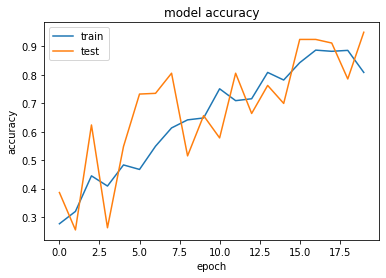

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Model_accuracy.jpg',dpi=500)
plt.show()

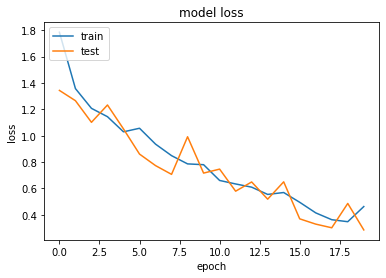

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Model_loss.jpg',dpi=500)
plt.show()

# Image prediction

In [22]:
import keras.utils as image
test_image = image.load_img('data/prediction/dark (39).png', target_size = (64, 64))
test_image = image.img_to_array(test_image)

In [23]:
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)

1/1 [==============================] - 0s 82ms/step


In [24]:
result

array([[5.9964073e-01, 6.8868045e-05, 3.8551426e-04, 3.9990488e-01]],
      dtype=float32)

In [25]:
dictionary = {'Dark': 0, 'Green': 1, 'Light': 2, 'Medium': 3}
prediction = np.argmax(result, axis = 1)
prediction = int(prediction)
key_list = list(dictionary.keys())
value_list = list(dictionary.values())
pos = value_list.index(prediction)
print('This bean is', key_list[prediction])

This bean is Dark


In [32]:
import cv2
im = cv2.imread('data/prediction/dark (39).png', 1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, key_list[prediction], (10,60), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite('prediction_text.jpg', im)

True